In [ ]:
!pip install langchain-core langchain-google-vertexai langchain-text-splitters langchain-experimental pypdf pydantic lxml pillow matplotlib opencv-python tiktoken unstructured[all-docs]==0.10.19

In [ ]:
!mkdir Documents-deltae

In [ ]:
path = "/content/Documents-deltae/"

In [ ]:
!pip install unstructured[all-docs]==0.10.19

In [ ]:
import base64
import os
import uuid
import re

from typing import List, Tuple

from IPython.display import display, Image, Markdown

from langchain.prompts import PromptTemplate
from langchain.retrievers.multi_vector import MultiVectorRetriever
from langchain.storage import InMemoryStore

from langchain_community.vectorstores import Chroma

from langchain_core.documents import Document
from langchain_core.runnables import RunnableLambda, RunnablePassthrough
from langchain_core.messages import AIMessage, HumanMessage
from langchain_core.output_parsers import StrOutputParser

from langchain_text_splitters import CharacterTextSplitter

from langchain_google_vertexai import (
    VertexAI,
    ChatVertexAI,
    VertexAIEmbeddings,
    VectorSearchVectorStore,
)

from unstructured.partition.pdf import partition_pdf

In [ ]:
!apt-get install -y poppler-utils tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  poppler-utils tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 4 newly installed, 0 to remove and 45 not upgraded.
Need to get 5,003 kB of archives.
After this operation, 16.3 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.4 [186 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 5,003 kB in 1s (5,041 kB/s)
Selecting previously unselected package popp

In [ ]:
raw_pdf_elements = partition_pdf(
    filename= path + "Rocky Mountains.pdf",
    strategy = "hi_res",
    extract_images_in_pdf=True,
    infer_table_structure=True,
    chunking_strategy="by_title",
    max_characters=4000,
    new_after_n_chars=3800,
    combine_text_under_n_chars=2000,
    image_output_dir_path=path,
)

In [ ]:
import google.generativeai as genai
from google.colab import userdata
GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')

In [ ]:
os.environ["GOOGLE_API_KEY"] = GOOGLE_API_KEY

In [ ]:
genai.configure(api_key = GOOGLE_API_KEY)

In [ ]:
tables = []
texts = []
for element in raw_pdf_elements:
  if "unstructured.documents.elements.Table" in str(type(element)):
    tables.append(str(element))
  elif "unstructured.documents.elements.CompositeElement" in str(type(element)):
    texts.append(str(element))

In [ ]:
from langchain_text_splitters import RecursiveCharacterTextSplitter
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=2000,
    chunk_overlap=200
)

In [ ]:
texts

['MONARCH NECTAR PLANTS',
 ' ',
 ' ',
 ' ',
 ' ',
 'Left to right: Monarch on swamp milkweed, littleflower penstemon, and Rocky Mountain blazing star.\n\nit is important to protect and restore habitat across their entire range. Adult monarchs depend on diverse nectar sources for food during all stages of the year, from spring and summer breeding to fall migration and overwintering. Inadequate milkweed and nectar plant food sources at any point may impact the number of monarchs that successfully arrive at overwintering sites in the fall.\n\nThe Rocky Mountains region spans large sections of Idaho, Montana, Wyoming, Utah, Colorado, and New Mexico. It is characterized by some of the tallest mountains in the continental U.S. and is home to diverse forests, serpentine river canyons, and high alpine zones. A huge variety of plants and wildflowers, from tiny alpine blooms to large stands of rabbitbrush and goldenrod, can be found in this region. These plant communities support numerous pollin

In [ ]:
texts[0]

'MONARCH NECTAR PLANTS'

In [ ]:
joined_texts = " ".join(texts)

In [ ]:
texts = text_splitter.split_text(joined_texts)

In [ ]:
tables

["to Fall to Fall Summer Summer to Fall Forbs Butterfly milkweed Showy milkweed Nettleleaf giant hyssop Tall fringed bluebells Blanketflower Common sunflower Dotted blazing star Flodman'’s thistle Jerusalem artichoke Maximiliani sunflower Missouri goldenrod Rocky Mountain beeplant Rocky Mountain blazing star Spotted joe pye weed Sulphur-flower buckwheat Swamp milkweed Swamp verbena Western coneflower Western goldentop Canada goldenrod Shrubs Woods' rose Littleflower penstemon Rubber rabbitbrush Yellow rabbitbrush Asclepias tuberosa Asclepias speciosa Agastache urticifolia Mertensia ciliata Gaillardia aristata Helianthus annuus Liatris punctata Cirsium flodmanii Helianthus tuberosus Helianthus maximiliani Solidago missouriensis Cleome serrulata Liatris ligulistylis Eutrochium maculatum Eriogonum umbellatum Asclepias incarnata Verbena hastata Rudbeckia occidentalis Euthamia occidentalis Solidago canadensis Rosa woodsii var. ultramontana Penstemon procerus Ericameria nauseosa viscidifloru

In [ ]:
model = genai.GenerativeModel("gemini-1.5-pro-latest")
response = model.generate_content("Who are you?")

In [ ]:
response

response:
GenerateContentResponse(
    done=True,
    iterator=None,
    result=glm.GenerateContentResponse({
      "candidates": [
        {
          "content": {
            "parts": [
              {
                "text": "I am a large language model, trained by Google. \n\nHere's a little more about me:\n\n* **I don't have a physical body:** I exist only as software and data.\n* **I'm always learning:** My knowledge and abilities are constantly being updated.\n* **My purpose is to help:** I can generate text, translate languages, write different kinds of creative content, and answer your questions in an informative way. \n\nEssentially, I'm a tool that can be used for many things. How you use me is up to you! \n"
              }
            ],
            "role": "model"
          },
          "finish_reason": 1,
          "index": 0,
          "safety_ratings": [
            {
              "category": 9,
              "probability": 1,
              "blocked": false
          

In [ ]:
!pip install langchain_google_genai

In [ ]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate
from langchain_google_genai import ChatGoogleGenerativeAI

model = ChatGoogleGenerativeAI(model="gemini-pro", temperature=0.3, google_api_key=GOOGLE_API_KEY)

prompt_template = """You are an assistant tasked with summarizing tables and text for retrieval. \
These summaries will be embedded and used to retrieve the raw text or table elements. \
Give a concise summary of the table or text that is well optimized for retrieval. Table or text: {element} """

prompt = ChatPromptTemplate.from_template(prompt_template)
summarize_chain = {"element": lambda x: x} | prompt | model | StrOutputParser()

In [ ]:
type(texts)

list

In [ ]:
text_summaries = summarize_chain.batch(texts, {"max_concurrency": 1})

In [ ]:
text_summaries[0]

'**Summary:**\n\nThis table showcases various nectar plants that support monarch butterflies in the Rocky Mountains region. These plants provide essential food sources for monarchs during breeding, migration, and overwintering. Planting these nectar-rich flowers in gardens, greenspaces, and farm borders helps support monarch populations and other pollinators.'

In [ ]:
text_summaries[1]

'**Monarchs:**\n- Migrate annually between overwintering sites in Mexico/California and breeding grounds across North America.\n- Decline due to habitat loss (milkweed destruction), disease, climate change, and insecticide use.\n\n**Rocky Mountain Plant Guide:**\n- Species adaptable to Rocky Mountain growing conditions.\n- Monarchs present July-October.\n- Includes 12 plant species with information on height, water needs, bloom time, flower color, and notes on monarch host plants.'

In [ ]:
table_summaries = summarize_chain.batch(tables, {"max_concurrency": 1})

In [ ]:
table_summaries[0]

'**Table Summary:**\n\nThis table lists various plant species, their bloom colors, heights, and other characteristics. It includes both forbs and shrubs, with a focus on those that are beneficial to monarchs or other pollinators.\n\n**Text Summary:**\n\nThis text provides additional information about the plant species listed in the table. It includes details on their blooming periods, monarch host plant status, soil preferences, and other notable characteristics.'

In [ ]:
img = "/content/Documents/figure-1-1.jpg"

In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(model="gemini-pro-vision")

In [ ]:
from PIL import Image
image_file = Image.open(img)

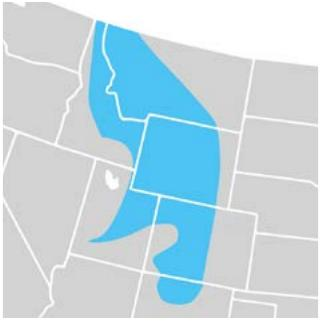

In [ ]:
image_file

In [ ]:
from langchain_core.messages import HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(model="gemini-pro-vision")
message = HumanMessage(
    content=[
        {
            "type": "text",
            "text": "Describe the content",
        },
        {"type": "image_url", "image_url": img},
    ]
)
llm.invoke([message])

AIMessage(content=' The map shows the range of the pygmy rabbit in North America. The pygmy rabbit is found in the sagebrush steppe of the western United States. The range of the pygmy rabbit is limited by the distribution of sagebrush, which is its primary food source.', response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': [{'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HATE_SPEECH', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HARASSMENT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_DANGEROUS_CONTENT', 'probability': 'NEGLIGIBLE', 'blocked': False}]}, id='run-63e6a558-1949-4c01-ad9e-641e3096f9c8-0')

In [ ]:
with open(img, "rb") as image_file:
  image_base64 =  base64.b64encode(image_file.read()).decode("utf-8")

In [ ]:
image_base64

'/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAFBAUEDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD2nU7y4guQkUm1doPQH1qtDqt0rfvGEg9MAU7WP+Pxf9wfzNUMcYoA3odThkA3HY3oazp9TuhO4jl+TPHyj/CqOBS4FAFo6neD/lt/46P8KT+1LzP+u/NR/hVajFAGjDrMi/61N49V4rQg1CCf7sgB9DXPYoxQB1YORmlFc1D

In [ ]:
def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        print(f"Image URI: {image_file}")
        return base64.b64encode(image_file.read()).decode("utf-8")


def image_summarize(img_path, prompt):
    model = ChatGoogleGenerativeAI(model="gemini-pro-vision")
    message = HumanMessage(
        content=[
            {
                "type": "text",
                "text": prompt,
            },
            {"type": "image_url", "image_url": img_path},
        ]
    )
    response = model.invoke([message])
    print(f"Content: {response.content}")
    return response.content


def generate_img_summaries(path):
    img_base64_list = []
    image_summaries = []

    prompt = """You are an automotive assistant tasked with summarizing images for retrieval. \
    These summaries will be embedded and use to retrieve the raw image. \
    Describe concisely the characteristics and content of the image. \
    """

    for img_file in sorted(os.listdir(path)):
        if img_file.endswith(".jpg"):
            img_path = os.path.join(path, img_file)
            print(f"Image path: {img_path}")
            base64_image = encode_image(img_path)
            print(f"base64_encoded_image: {base64_image}")
            img_base64_list.append(base64_image)
            print("Success encoding the image...")
            image_summaries.append(image_summarize(img_path, prompt))

    return img_base64_list, image_summaries


In [ ]:
sample_path = "/content/Sample/"
image_summaries = []
image_base64_list = []

In [ ]:
img_base64_list, image_summaries = generate_img_summaries(sample_path)

Image path: /content/Documents/figure-3-2.jpg
Image URI: <_io.BufferedReader name='/content/Sample/IIT-G Gemini Research (1).jpg'>
base64_encoded_image: /9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAH4Aa4DASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD1+ZftVmJuskZw2PS

In [ ]:
img_base64_list

['/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAH4Aa4DASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD1+ZftVmJuskZw2PSqQHJINWLOcQz/ADfccbSKZcw/Z5yvY8j3FAEdFJmloAKQ9sUtHcUAWNPXNzvP3UGTUEz+ZK79ic1aiPk6bLJ3kbaPpVLsB2oAUZx0OKjknjj5ZwoHrRKhlTaGK+4qg2jKzEmdzn1rWnCD+N2OetOtH+

In [ ]:
image_summaries

[' The image shows two purple prairie flowers in focus against a slightly blurred background of green foliage. The flowers have a fuzzy appearance.']

In [ ]:
img_base64_list, image_summaries = generate_img_summaries(path)

Image path: /content/Documents-deltae/figure-1-1.jpg
Image URI: <_io.BufferedReader name='/content/Documents-deltae/figure-1-1.jpg'>
base64_encoded_image: /9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAFBAUEDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD2nU7y4guQkUm1d

In [ ]:
image_summaries

[' An irregularly shaped blue blob on a map of the western United States.',
 ' The image shows a close-up of two purple flowers with long, thin petals. The flowers are in front of a dark green background.',
 ' A monarch butterfly with orange and black wings is perched on a stalk of purple milkweed flowers. The butterfly has its wings open and is facing the left of the image. The milkweed flowers are in focus and have a blurred background.',
 ' The image shows a flower with five petals. The petals are purple with dark purple veins. The flower is surrounded by green leaves.',
 ' The image is a logo with a circular green and blue background.     Inside the circle is a black raccoon wearing a brown hat.     The words "National Wildlife Federation" curve around the top of the circle.     The words "Garden for Wildlife" are below the circle in black, with a green leaf between the words.',
 ' The image shows a dark blue "X" shape, tilted to the left, with four smaller shapes coming off of it.

In [ ]:
img_base64_list

['/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAFBAUEDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD2nU7y4guQkUm1doPQH1qtDqt0rfvGEg9MAU7WP+Pxf9wfzNUMcYoA3odThkA3HY3oazp9TuhO4jl+TPHyj/CqOBS4FAFo6neD/lt/46P8KT+1LzP+u/NR/hVajFAGjDrMi/61N49V4rQg1CCf7sgB9DXPYoxQB1YORmlFc1

In [ ]:
!pip install open_clip_torch torch chromadb tiktoken

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 526.8/526.8 kB 32.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 47.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.1/106.1 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 7.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 283.7/283.7 kB

In [ ]:
import uuid

from langchain.retrievers.multi_vector import MultiVectorRetriever
from langchain.storage import InMemoryStore
from langchain_community.vectorstores import Chroma
from langchain_core.documents import Document
from langchain_experimental.open_clip import OpenCLIPEmbeddings


def create_multi_vector_retriever(
    vectorstore, text_summaries, texts, table_summaries, tables, image_summaries, images
):

    store = InMemoryStore()
    id_key = "doc_id"

    retriever = MultiVectorRetriever(
        vectorstore=vectorstore,
        docstore=store,
        id_key=id_key,
    )
    def add_documents(retriever, doc_summaries, doc_contents):
        doc_ids = [str(uuid.uuid4()) for _ in doc_contents]
        summary_docs = [
            Document(page_content=s, metadata={id_key: doc_ids[i]})
            for i, s in enumerate(doc_summaries)
        ]
        retriever.vectorstore.add_documents(summary_docs)
        retriever.docstore.mset(list(zip(doc_ids, doc_contents)))

    if text_summaries:
        add_documents(retriever, text_summaries, texts)

    if table_summaries:
        add_documents(retriever, table_summaries, tables)

    if image_summaries:
        add_documents(retriever, image_summaries, images)

    return retriever

In [ ]:
vectorstore = Chroma(
    collection_name="mm_rag_iit-g", embedding_function=OpenCLIPEmbeddings()
)
retriever_mm = create_multi_vector_retriever(
    vectorstore,
    text_summaries,
    texts,
    table_summaries,
    tables,
    image_summaries,
    img_base64_list,
)

open_clip_pytorch_model.bin:   0%|          | 0.00/3.94G [00:00<?, ?B/s]

In [ ]:
import io
import re

from IPython.display import HTML, display
from langchain_core.runnables import RunnableLambda, RunnablePassthrough
from PIL import Image


def plt_img_base64(img_base64):

    image_html = f'<img src="data:image/jpeg;base64,{img_base64}" />'

    display(HTML(image_html))


def looks_like_base64(sb):
  return re.match("^[A-Za-z0-9+/]+[=]{0,2}$", sb) is not None


def is_image_data(b64data):

    image_signatures = {
        b"\xff\xd8\xff": "jpg",
        b"\x89\x50\x4e\x47\x0d\x0a\x1a\x0a": "png",
        b"\x47\x49\x46\x38": "gif",
        b"\x52\x49\x46\x46": "webp",
    }
    try:
        header = base64.b64decode(b64data)[:8]
        for sig, format in image_signatures.items():
            if header.startswith(sig):
                return True
        return False
    except Exception:
        return False


def resize_base64_image(base64_string, size=(128, 128)):

    img_data = base64.b64decode(base64_string)
    img = Image.open(io.BytesIO(img_data))


    resized_img = img.resize(size, Image.LANCZOS)


    buffered = io.BytesIO()
    resized_img.save(buffered, format=img.format)


    return base64.b64encode(buffered.getvalue()).decode("utf-8")


def split_image_text_types(docs):
    b64_images = []
    texts = []
    for doc in docs:
        if isinstance(doc, Document):
            doc = doc.page_content
        if looks_like_base64(doc) and is_image_data(doc):
            doc = resize_base64_image(doc, size=(1300, 600))
            b64_images.append(doc)
        else:
            texts.append(doc)
    if len(b64_images) > 0:
        return {"images": b64_images[:1], "texts": []}
    return {"images": b64_images, "texts": texts}


def img_prompt_func(data_dict):
    formatted_texts = "\n".join(data_dict["context"]["texts"])
    messages = []
    text_message = {
        "type": "text",
        "text": (
            "As an expert chatbot for the Rocky Mountains, your task is to analyze and interpret images, "
            "considering their historical and cultural significance. Alongside the images, you will be "
            "provided with related text to offer context. Both will be retrieved from a vectorstore based "
            "on user-input keywords. Please use your extensive knowledge and analytical skills to provide a "
            "comprehensive summary that includes:\n"
            "- A detailed description of the visual elements in the image.\n"
            "- The context of the image.\n"
            "- An interpretation of the image's symbolism and meaning.\n"
            "- Connections between the image and the related text.\n\n"
            f"User-provided keywords: {data_dict['question']}\n\n"
            "Text and / or tables:\n"
            f"{formatted_texts}"
        ),
    }
    messages.append(text_message)

    if data_dict["context"]["images"]:
        for image in data_dict["context"]["images"]:
            image_message = {
                "type": "image_url",
                "image_url": {"url": f"data:image/jpeg;base64,{image}"},
            }
            messages.append(image_message)
    return [HumanMessage(content=messages)]

In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI

model = ChatGoogleGenerativeAI(model="gemini-1.5-pro-latest", temperature=0.3, google_api_key=GOOGLE_API_KEY)
chain_mm_rag = (
    {
        "context": retriever_mm | RunnableLambda(split_image_text_types),
        "question": RunnablePassthrough(),
    }
    | RunnableLambda(img_prompt_func)
    | model
    | StrOutputParser()
)

In [ ]:
from PIL import Image
def multimodal_search(query: str) -> str:
  docs = retriever_mm.invoke(query, limit=3)
  source_docs = split_image_text_types(docs)
  print("-" * 80)
  print("Retrieved Text Sources:")
  print("=" * 80)
  for i, source in enumerate(source_docs["texts"]):
    source_without_linebreaks = source.replace("\n", " ")
    print(f"Retrieved chunk {i+1}: {source_without_linebreaks}")
  for img_data in source_docs["images"]:
    try:
      print("\n")
      print("-" * 80)
      print("\nRetrieved Images Matching Source Documents:")
      print("=" * 80)
      display(Image.open(io.BytesIO(base64.b64decode(img_data))))
    except (TypeError):
      print("Error displaying an image. Skipping...")


  result = chain_mm_rag.invoke(query)
  print("\n\n")
  print("=" * 80)
  print("Multimodal RAG Output:")
  print("=" * 80)

  return result

In [ ]:
query = "Tell me about monarchs in the Rocky Mountains."
result = multimodal_search(query)
Markdown(result)

--------------------------------------------------------------------------------
Retrieved Text Sources:
Retrieved chunk 1: Journey North www.learner.org/jnorth/monarch  Monarch Larva Monitoring Project www.mlmp.org  Project Monarch Health www.monarchparasites.org  Acknowledgements  Nectaring data and observations, background information, and other contributions to this publication were taken from the published literature and generously provided by multiple researchers, gardeners, partners, and biologists. For the full list of data sources, please visit our website: www.xerces.org/monarch-nectar-plants. Funding provided by the Monarch Joint Venture and USDA Natural Resources Conservation Service. Additional support comes from Cascadian Farm, Ceres Trust, Cheerios, CS Fund, Disney Conservation Fund, The Dudley Foundation, The Edward Gorey Charitable Trust, General Mills, National Co+op Grocers, Nature Valley, The New-Land Foundation, Inc., Turner Foundation, Inc., Whole Foods Market and

As there is no image provided, I cannot provide a detailed description of visual elements. However, I can offer information about monarch butterflies in the Rocky Mountains based on the text provided.

The text focuses on the importance of providing resources for monarch butterflies in the Rocky Mountains, specifically milkweed as a host plant and nectar plants as food sources. 

While we don't have a specific image to analyze, we can imagine a photograph of a monarch butterfly nectaring on a Rocky Mountain wildflower. This image would symbolize the interconnectedness of the monarch's lifecycle with the regional ecosystem. 

Here's how the text connects to this imagined image:

* **Monarch Migration:** The text explains that monarchs migrate through the Rocky Mountains, highlighting the region's significance as a summer breeding ground and a stopover point during their fall migration. Our imagined image would capture a moment in this journey.
* **Importance of Milkweed:** The text emphasizes the critical role of milkweed as the sole host plant for monarch caterpillars. While our image wouldn't show this stage, it would implicitly connect the adult butterfly's presence to the availability of milkweed in the surrounding area.
* **Nectar Plant Diversity:** The text advocates for planting a variety of nectar-rich plants to support monarchs throughout their time in the Rocky Mountains. Our image would showcase the beauty and diversity of these wildflowers, emphasizing their importance as a food source for monarchs.

The text also highlights the threats monarchs face, such as habitat loss and pesticide use. Our imagined image could serve as a reminder of the fragility of this species and the importance of conservation efforts. 

Overall, even without a specific image, the text provides valuable information about the significance of the Rocky Mountains for monarch butterflies. It underscores the need for habitat conservation and encourages individuals to contribute by planting milkweed and nectar plants. 


--------------------------------------------------------------------------------
Retrieved Text Sources:


--------------------------------------------------------------------------------

Retrieved Images Matching Source Documents:


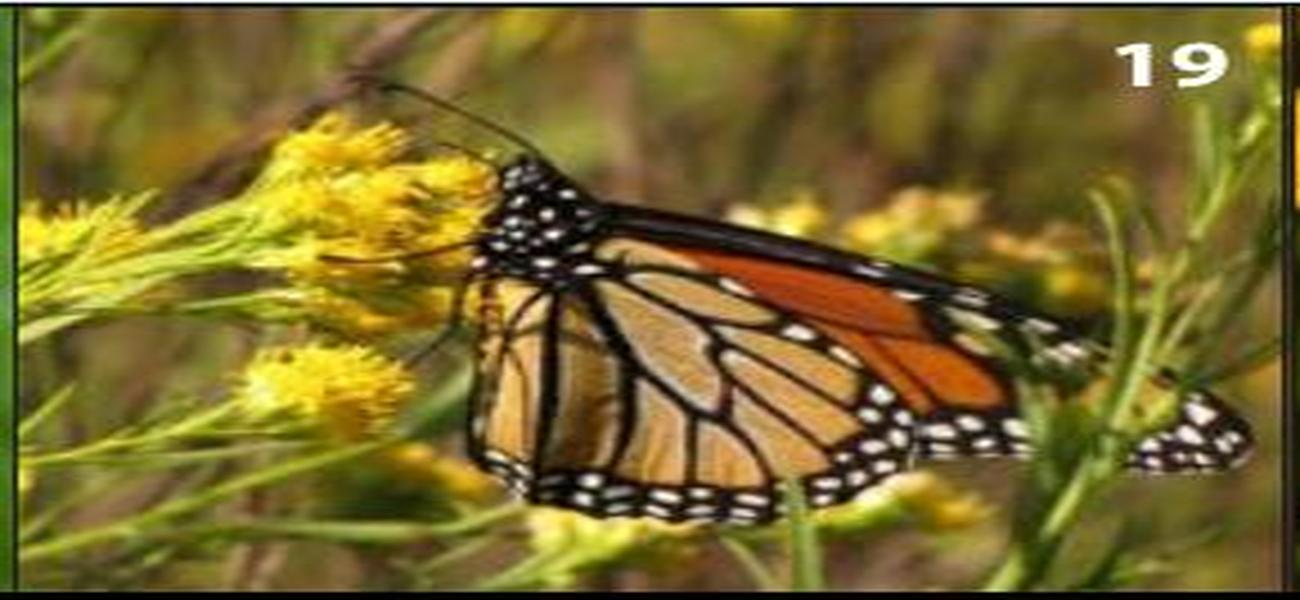




Multimodal RAG Output:


The image showcases a vibrant Monarch butterfly perched upon a cluster of bright yellow wildflowers. The butterfly's wings, a striking contrast of deep orange and black veins, are fully extended, revealing intricate white dots bordering the black. Its delicate legs cling to the flower's head, suggesting it's in the act of drawing nectar. The background is a blur of green, emphasizing the butterfly and flowers as the focal point.

While no specific text was provided, the image itself speaks volumes. Monarch butterflies are renowned for their incredible migratory journey across North America, a feat of endurance and natural beauty. Their presence on wildflowers, especially in the Rocky Mountain region, symbolizes the interconnectedness of the ecosystem. 

The image evokes a sense of tranquility and harmony, capturing a fleeting moment of natural beauty. The butterfly, a symbol of transformation and resilience, feeding on the nectar of wildflowers speaks to the delicate balance of life in the Rockies. It reminds us of the vital role pollinators play in maintaining biodiversity and the importance of preserving these natural habitats. 


In [ ]:
query = "Give me an image of a butterfly sitting on a flower."
result = multimodal_search(query)
Markdown(result)

**Table Data Issue**

--------------------------------------------------------------------------------
Retrieved Text Sources:


--------------------------------------------------------------------------------

Retrieved Images Matching Source Documents:


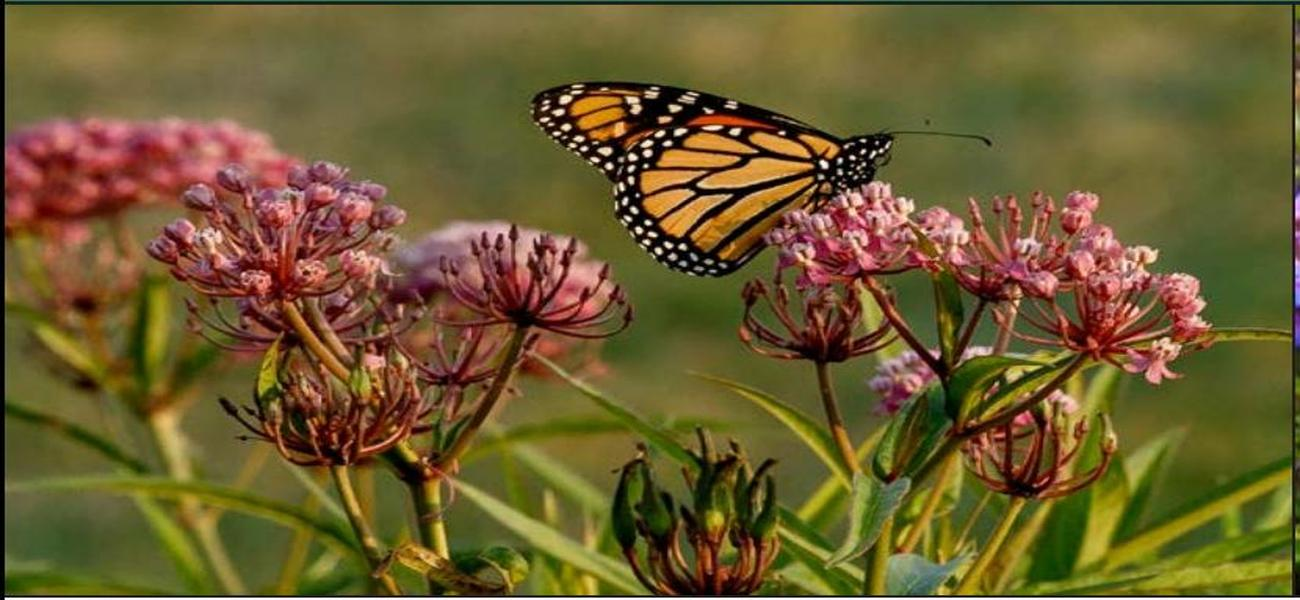




Multimodal RAG Output:


The image showcases a vibrant Monarch butterfly perched upon a cluster of delicate pink milkweed flowers. The butterfly, with its striking orange wings laced with black veins and white dots, is captured mid-flight, its wings slightly raised as it feeds on the nectar of the blossoms. The milkweed plant itself is depicted with multiple stems, each bearing a spherical umbel of numerous tiny pink flowers. The background is a soft blur of green, emphasizing the sharp focus on the butterfly and flowers.

The image captures a crucial ecological relationship. Monarch butterflies rely heavily on milkweed plants for their survival. The milkweed provides not only nectar for the adult butterflies but also serves as the sole host plant for their larvae. Monarch caterpillars feed exclusively on milkweed leaves, which contain cardiac glycosides that make them toxic to predators, offering them protection.

The image symbolizes the interconnectedness of nature and the delicate balance of ecosystems. The Monarch butterfly, a symbol of transformation and resilience, is intrinsically linked to the milkweed plant, highlighting the dependence of one species on another. The vibrant colors and delicate details of both the butterfly and the flowers evoke a sense of beauty and fragility, reminding us of the importance of preserving biodiversity.

While the image beautifully illustrates the relationship between Monarch butterflies and milkweed, it doesn't directly answer the user's question about the maximum height of Butterfly milkweed. To answer that, we would need additional information from the vectorstore, specifically about the growth habits of different milkweed species. 


In [ ]:
query = "What is the maximum height of Butterfly milkweed?"
result = multimodal_search(query)
Markdown(result)

**Image-text-text**

In [ ]:
img = "/content/Documents-deltae/sunflower.jpg"

In [ ]:
prompt = """You are an assistant responsible for describing the content and characteristics of the image provided.
Describe consisely the characteristics and content of the image.
"""

In [ ]:
model = ChatGoogleGenerativeAI(model="gemini-pro-vision")
message = HumanMessage(
    content=[
        {
            "type": "text",
            "text": prompt,
        },
        {"type": "image_url", "image_url": img},
    ]
)
response = model.invoke([message])

In [ ]:
response.content

' The image contains a sunflower in the center of the frame. The sunflower is in focus, with a blurred background of other sunflowers. The sunflower is yellow with a brown center. The petals of the sunflower are spread open. The sunflower is facing the camera. The sunflower is surrounded by green leaves. The background is a blue sky with white clouds. The image is taken from a low angle, making the sunflower appear larger than life.'

In [ ]:
query = "What does the image mean? \n\n" + response.content

In [ ]:
print(query)

What does the image mean? 

 The image contains a sunflower in the center of the frame. The sunflower is in focus, with a blurred background of other sunflowers. The sunflower is yellow with a brown center. The petals of the sunflower are spread open. The sunflower is facing the camera. The sunflower is surrounded by green leaves. The background is a blue sky with white clouds. The image is taken from a low angle, making the sunflower appear larger than life.


--------------------------------------------------------------------------------
Retrieved Text Sources:


--------------------------------------------------------------------------------

Retrieved Images Matching Source Documents:


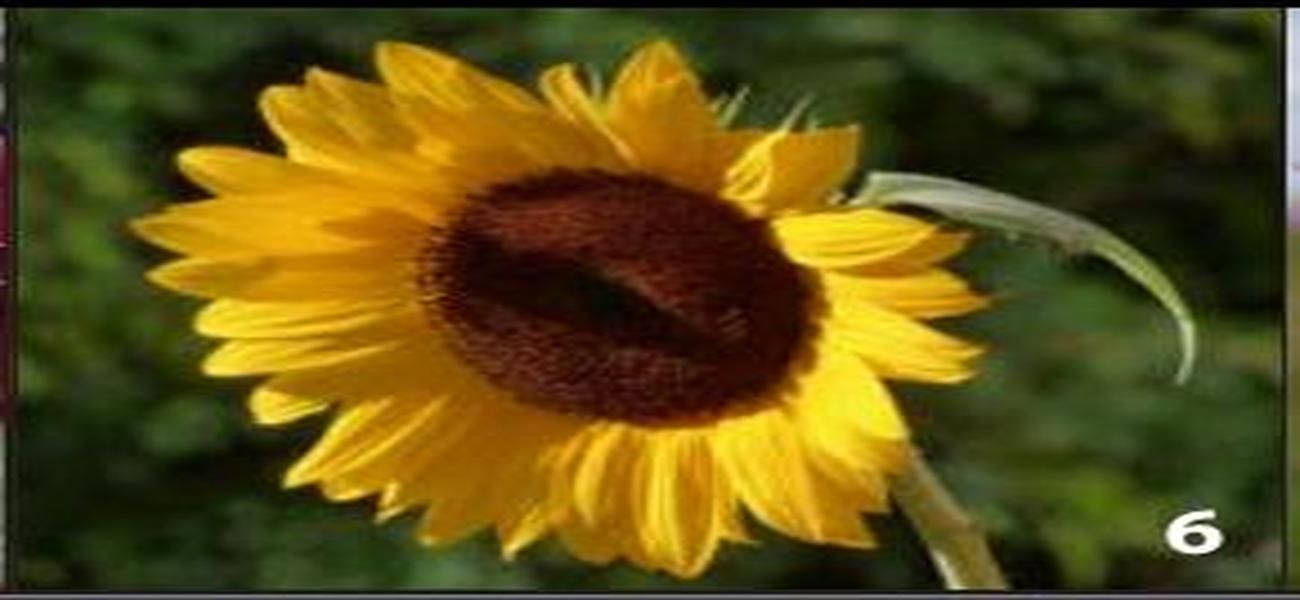




Multimodal RAG Output:


The image showcases a single sunflower in full bloom, dominating the frame. Its vibrant yellow petals are fully extended, encircling a dark brown central disc. The sunflower is slightly tilted, giving the impression of it basking in the sunlight. The background is a soft blur of green foliage and other sunflowers, suggesting a field or garden setting. The low angle of the shot emphasizes the sunflower's height and grandeur, making it appear larger than life.

While the text doesn't provide specific historical or cultural context, sunflowers generally symbolize joy, optimism, and longevity. Their tendency to follow the sun throughout the day is often associated with seeking positivity and light. 

The image's focus on a single sunflower, with others blurred in the background, could symbolize individuality and standing out from the crowd. Its vibrant yellow color and full bloom suggest a state of flourishing and vitality. The low angle reinforces this idea, presenting the sunflower as a powerful and impressive figure.

In conclusion, the image is a celebration of the sunflower's beauty and symbolic meaning. It evokes feelings of joy, optimism, and the power of individuality. Although the text doesn't offer specific historical or cultural connections, the image's universal symbolism resonates with viewers, making it a powerful representation of nature's beauty and life's potential. 


In [ ]:
result = multimodal_search(query)
Markdown(result)

In [ ]:
result = multimodal_search("To what regions does the Rocky Mountains span?")
Markdown(result)

--------------------------------------------------------------------------------
Retrieved Text Sources:
Retrieved chunk 1: Journey North www.learner.org/jnorth/monarch  Monarch Larva Monitoring Project www.mlmp.org  Project Monarch Health www.monarchparasites.org  Acknowledgements  Nectaring data and observations, background information, and other contributions to this publication were taken from the published literature and generously provided by multiple researchers, gardeners, partners, and biologists. For the full list of data sources, please visit our website: www.xerces.org/monarch-nectar-plants. Funding provided by the Monarch Joint Venture and USDA Natural Resources Conservation Service. Additional support comes from Cascadian Farm, Ceres Trust, Cheerios, CS Fund, Disney Conservation Fund, The Dudley Foundation, The Edward Gorey Charitable Trust, General Mills, National Co+op Grocers, Nature Valley, The New-Land Foundation, Inc., Turner Foundation, Inc., Whole Foods Market and

As there are no images provided, I cannot provide a description of visual elements or interpret symbolism. However, I can address the other aspects of your request based on the text provided.

**Context of the Text:**

The text is an excerpt from a guide focusing on native plants in the Rocky Mountains that support monarch butterflies. It emphasizes the importance of providing milkweed (the monarch caterpillar's host plant) and nectar-rich flowers for monarchs throughout their life cycle, especially during their summer breeding season in the Rockies.

**Connections between the Text and User-provided Keywords:**

The text directly answers the user's question, "To what regions does the Rocky Mountains span?" It states that the Rocky Mountains region covers large parts of Idaho, Montana, Wyoming, Utah, Colorado, and New Mexico.

**Interpretation of the Text's Meaning:**

The text highlights the interconnectedness of ecosystems and the importance of conservation efforts. It emphasizes that:

* **Monarch butterflies rely on specific plants:** Milkweed is essential for monarch caterpillars, while diverse nectar sources are crucial for adult butterflies.
* **Habitat loss threatens monarchs:** Herbicide use, habitat degradation, and other factors contribute to the decline of monarch populations.
* **Protecting monarchs requires a range-wide approach:**  Because monarchs migrate across vast distances, conservation efforts must address their needs throughout their entire range.
* **Individuals can contribute to conservation:** Planting native milkweed and nectar plants in gardens and green spaces can provide crucial support for monarchs.

**Overall, the text underscores the importance of understanding and protecting the delicate balance of the Rocky Mountain ecosystem and the species that depend on it.** 
